In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.impute import SimpleImputer 

In [21]:
housing = pd.read_csv("realtor-data.csv")
housing = housing.drop(columns=['zip_code', 'sold_date', 'status'])
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613159 entries, 0 to 613158
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         613159 non-null  float64
 1   bed           507459 non-null  float64
 2   bath          513691 non-null  float64
 3   acre_lot      474193 non-null  float64
 4   full_address  613159 non-null  object 
 5   street        612227 non-null  object 
 6   city          613095 non-null  object 
 7   state         613159 non-null  object 
 8   house_size    440048 non-null  float64
dtypes: float64(5), object(4)
memory usage: 42.1+ MB


In [9]:
# Create Test Set

def shuffle_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_split_data(housing, 0.2)

In [22]:
housing.head()

,price,bed,bath,acre_lot,full_address,street,city,state,house_size
0,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,NaN


In [5]:
# standard correlation coefficient (Pearson's r)

corr_matrix = housing.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending=False)

# we can see that there is a weak positive correlation between price and bedrooms, bathrooms, and house size

price         1.000000
bath          0.296602
house_size    0.195322
bed           0.184425
acre_lot      0.007549
Name: price, dtype: float64

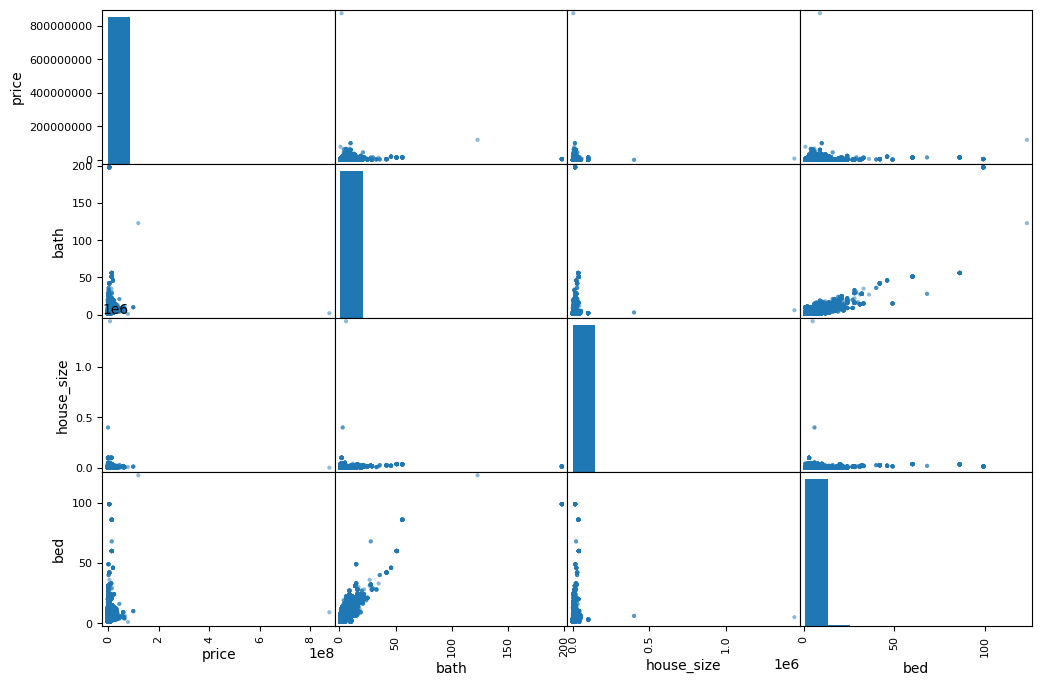

In [6]:
# plot correlations on most numerical attributes using scatter_matrix()

attributes = ['price', 'bath', 'house_size', 'bed']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

In [25]:
# Further exploratory analysis

housing['price/sf'] = (housing['price'] / housing['house_size']).round(2) # price per square foot
housing.groupby('state').mean()

# To deal with NaN values, we will impute any missing values with the overall median of that category rather than dropping any
# rows with a missing value.

C:\Users\tejpa\AppData\Local\Temp\ipykernel_4964\3238206701.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  housing.groupby('state').mean()


,price,bed,bath,acre_lot,house_size,price/sf
state,,,,,,
Connecticut,4.541299e+05,3.500950,2.525905,41.952539,2065.023499,212.256063
Delaware,2.076427e+05,3.017668,1.859206,2.633705,1529.180451,143.332406
Georgia,4.927036e+05,5.000000,3.500000,0.910000,3388.500000,150.147500
Maine,4.200100e+05,3.486499,2.343023,17.951492,2141.072729,261.586061
Massachusetts,9.757505e+05,3.525640,2.683854,4.100811,2282.311193,502.459194
New Hampshire,4.807679e+05,3.168851,2.502738,10.652621,2257.391891,261.969607
New Jersey,6.847730e+05,3.606280,2.732429,25.695480,3063.948836,326.392075
New York,1.624479e+06,2.899158,2.278338,31.284739,1888.147196,905.675818
Pennsylvania,2.778305e+05,3.287565,2.484928,2.425516,2252.215206,154.834910


In [47]:
# Scikit-Learn Simple Imputer

imputer = SimpleImputer(strategy = 'median')

# Select only numerical attributes from housing data so imputer can properly work

housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
housing_num.median().values 
X = imputer.transform(housing_num) # Successful imputation, no NaN values

array([[1.0500e+05, 3.0000e+00, 2.0000e+00, 1.2000e-01, 9.2000e+02,
        1.1413e+02],
       [8.0000e+04, 4.0000e+00, 2.0000e+00, 8.0000e-02, 1.5270e+03,
        5.2390e+01],
       [6.7000e+04, 2.0000e+00, 1.0000e+00, 1.5000e-01, 7.4800e+02,
        8.9570e+01],
       ...,
       [1.5000e+06, 6.0000e+00, 3.0000e+00, 3.9700e+00, 3.9940e+03,
        3.7556e+02],
       [5.5000e+05, 1.1000e+01, 3.0000e+00, 2.8000e-01, 1.7300e+03,
        2.6358e+02],
       [3.7500e+05, 7.0000e+00, 5.0000e+00, 4.1000e-01, 1.7300e+03,
        2.6358e+02]])